<a href="https://colab.research.google.com/github/devt-vari/Walmart_-_Confidence_Interval_and_CLT./blob/main/Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: Walmart - Confidence Interval and CLT

### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide

### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


### Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

|Variable    |Description       |
|:--------------|:-------------------|
|User_ID:| 	User ID|
|Product_ID:| 	Product ID
|Gender:| 	Sex of User
|Age:| 	Age in bins
|Occupation:| 	Occupation(Masked)
|City_Category:| 	Category of the City (A,B,C)
|StayInCurrentCityYears:| 	Number of years stay in current city
|Marital_Status:| 	Marital Status
|ProductCategory:| 	Product Category (Masked)
|Purchase:| 	Purchase Amount


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [5]:
print(f"Number of Rows: {df.shape[0]} \nNumber of Columns: {df.shape[1]}")

Number of Rows: 175302 
Number of Columns: 10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175302 entries, 0 to 175301
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     175302 non-null  int64  
 1   Product_ID                  175302 non-null  object 
 2   Gender                      175302 non-null  object 
 3   Age                         175301 non-null  object 
 4   Occupation                  175301 non-null  float64
 5   City_Category               175301 non-null  object 
 6   Stay_In_Current_City_Years  175301 non-null  object 
 7   Marital_Status              175301 non-null  float64
 8   Product_Category            175301 non-null  float64
 9   Purchase                    175301 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 13.4+ MB


Change the datatype of - Occupation, Marital_Status & Product_Category

In [7]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

In [8]:
df.dtypes # columns changed to object data-type

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                     object
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                 object
Product_Category               object
Purchase                      float64
dtype: object

In [9]:
df.memory_usage()

Index                             128
User_ID                       1402416
Product_ID                    1402416
Gender                        1402416
Age                           1402416
Occupation                    1402416
City_Category                 1402416
Stay_In_Current_City_Years    1402416
Marital_Status                1402416
Product_Category              1402416
Purchase                      1402416
dtype: int64

In [10]:
df.describe()

,User_ID,Purchase
count,1.753020e+05,175301.000000
mean,1.002858e+06,9312.438737
std,1.719718e+03,4977.884241
min,1.000001e+06,185.000000
25%,1.001369e+06,5854.000000
50%,1.002778e+06,8056.000000
75%,1.004303e+06,12060.000000
max,1.006040e+06,23961.000000


In [11]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [12]:
df.dropna(inplace=True)

###Observations :
- There are no missing values in the dataset
- Purchase amount might have outliers

In [13]:
# How many users are there in the dataset?
df['User_ID'].nunique()

5885

In [14]:
# How many products are there in total?
df['Product_ID'].nunique()

3448

Value_counts for the following:

- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

In [15]:
Categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status','Product_Category']
df[Categorical_cols].melt().groupby(['variable','value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.028003
                           18-25  0.184717
                           26-35  0.396438
                           36-45  0.199577
                           46-50  0.081654
                           51-55  0.070330
                           55+    0.039281
City_Category              A      0.269839
                           B      0.420619
                           C      0.309542
Gender                     F      0.246359
                           M      0.753641
Marital_Status             0.0    0.590327
                           1.0    0.409673
Occupation                 0.0    0.127392
                           1.0    0.085265
                           2.0    0.047359
                           3.0    0.032995
                           4.0    0.132566
                           5.0    0.021226
                           6.0    0.036600
                           7.0    0.106999
                           8.0    0.002789
                           9.0    0.011472
                           10.0   0.024050
                           11.0   0.022111
                           12.0   0.056029
                           13.0   0.014535
                           14.0   0.049458
                           15.0   0.021825
                           16.0   0.045750
                           17.0   0.071911
                           18.0   0.011734
                           19.0   0.015921
                           20.0   0.062013
Product_Category           1.0    0.256410
                           2.0    0.044096
                           3.0    0.037359
                           4.0    0.021723
                           5.0    0.276735
                           6.0    0.036634
                           7.0    0.006766
                           8.0    0.209485
                           9.0    0.000753
                           10.0   0.009355
                           11.0   0.044946
                           12.0   0.007216
                           13.0   0.010017
                           14.0   0.002715
                           15.0   0.011534
                           16.0   0.017598
                           17.0   0.001090
                           18.0   0.005568
Stay_In_Current_City_Years 0      0.135099
                           1      0.350295
                           2      0.185835
                           3      0.173194
                           4+     0.155578

Observations:
- Approx 80% of the users are between the age 18-50(40%: 26-35, 18%: 18-25, 20%: 36-45)
- 75% of the users are **Male** and 25% are **Female**
- 60% are **Single** and 40% are **Married**
- 35% staying in the city for 1 year, 18% for 2 years, 17% for 3 years
- Total of 18 product category are there in total
- There are 20 different types of occupation in the city

###Univarite Analysis

Understanding the distribution of data and detecting outliers for continuous/numerical variables

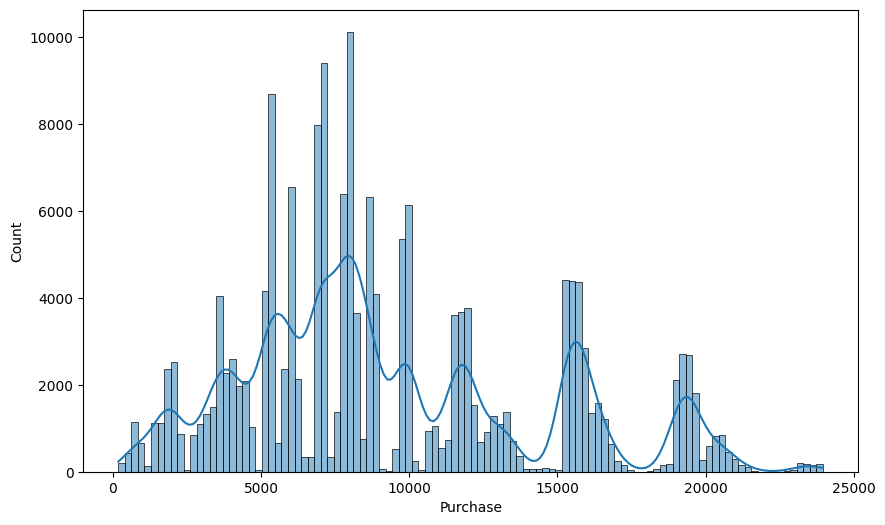

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df, x='Purchase', kde=True)
plt.show()

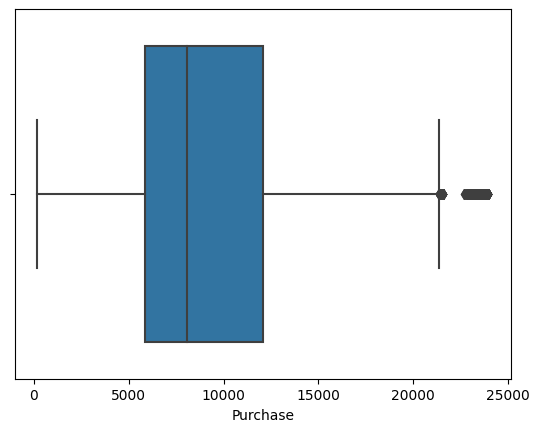

In [17]:
sns.boxplot(df, x='Purchase', orient='h')
plt.show()

Observations:
- Purchase contains outliers

Understanding the distribution of data for the categorical variables
- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

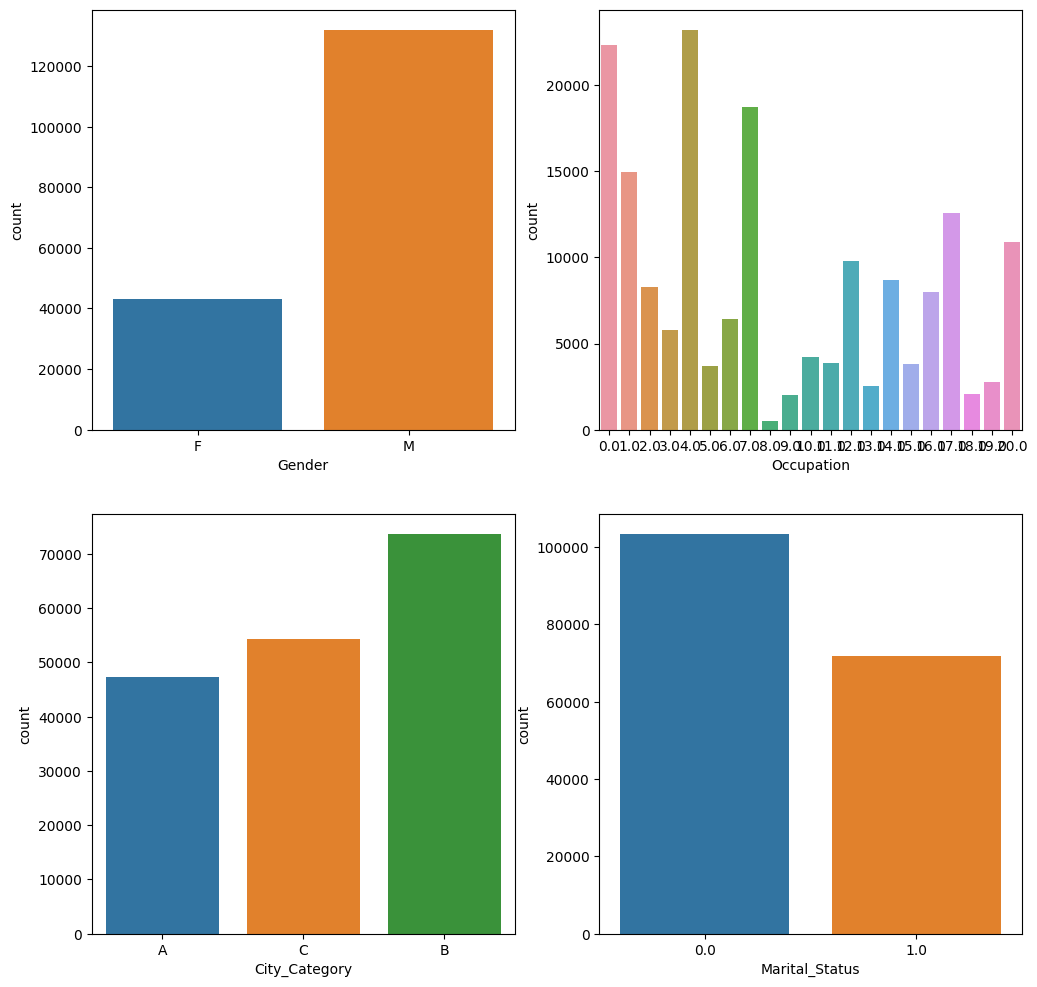

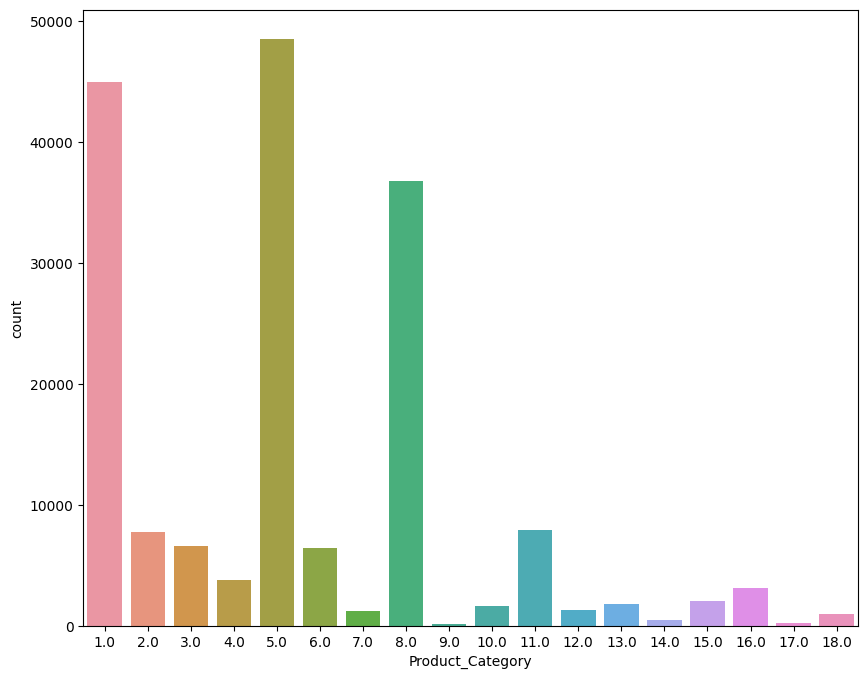

In [18]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
sns.countplot(df, x='Gender',ax=axis[0,0])
sns.countplot(df, x='Occupation',ax=axis[0,1])
sns.countplot(df, x='City_Category',ax=axis[1,0])
sns.countplot(df, x='Marital_Status',ax=axis[1,1])
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(df, x='Product_Category')
plt.show()

Observations:
- **Male** users are more than Female
- Occupation and Product_Category consists of 20 different types
- More users belong to City_Category -> B
- Single users are more than Married users
- Product_Category - 1, 5 & 8 have highest purchasing frequency

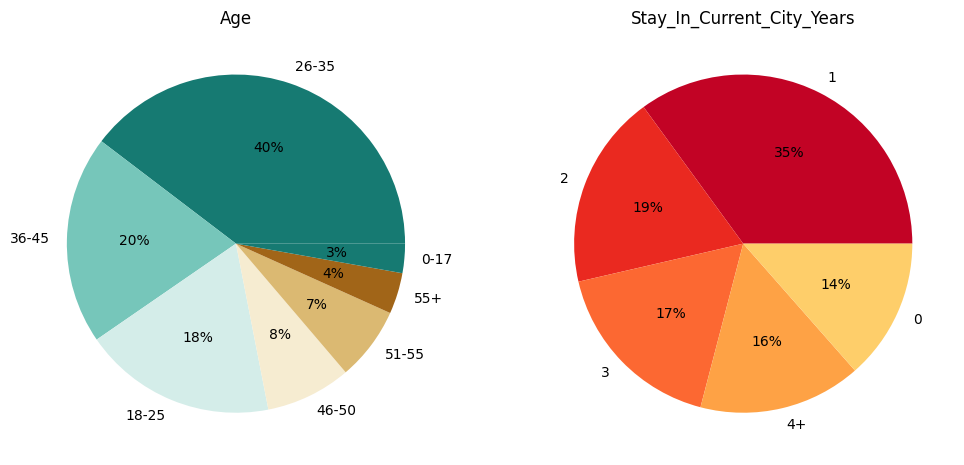

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

###Bi-variate Analysis

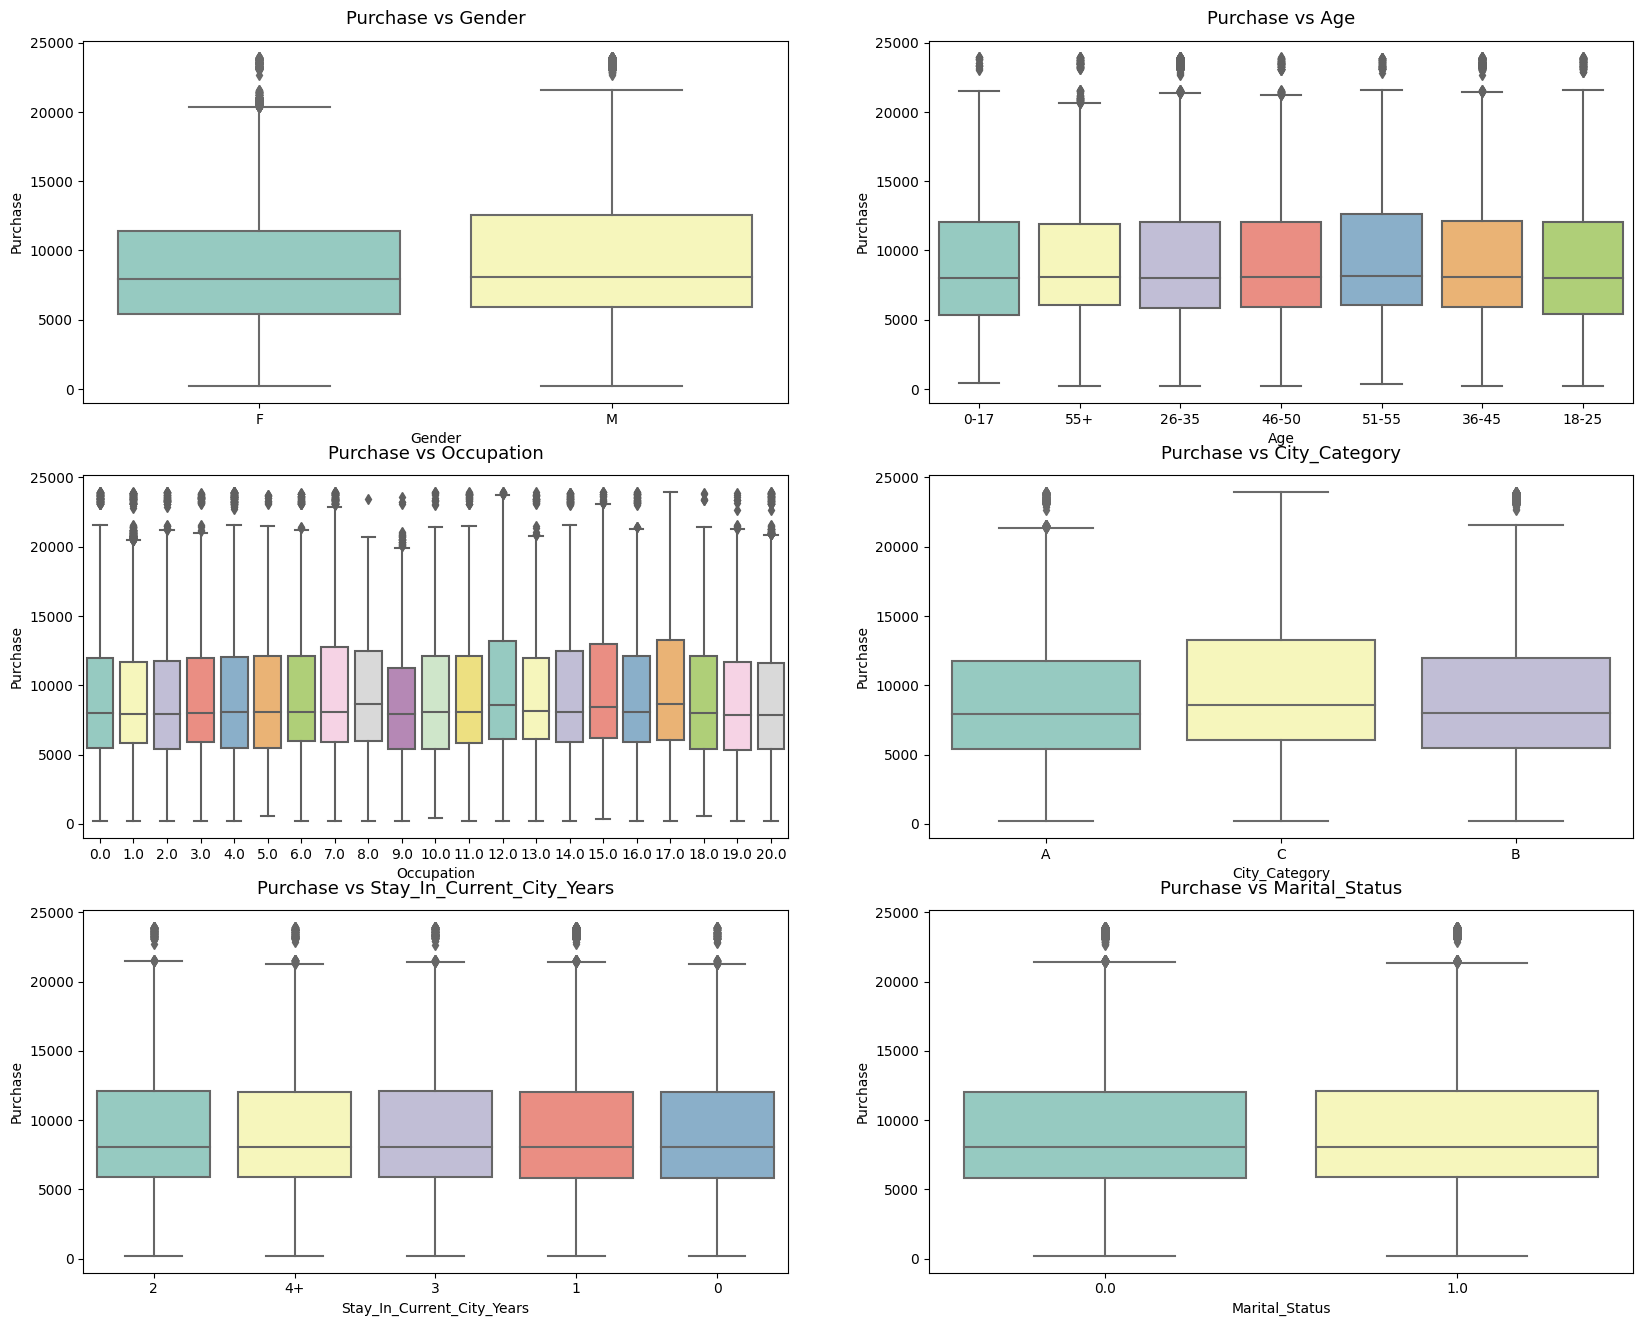

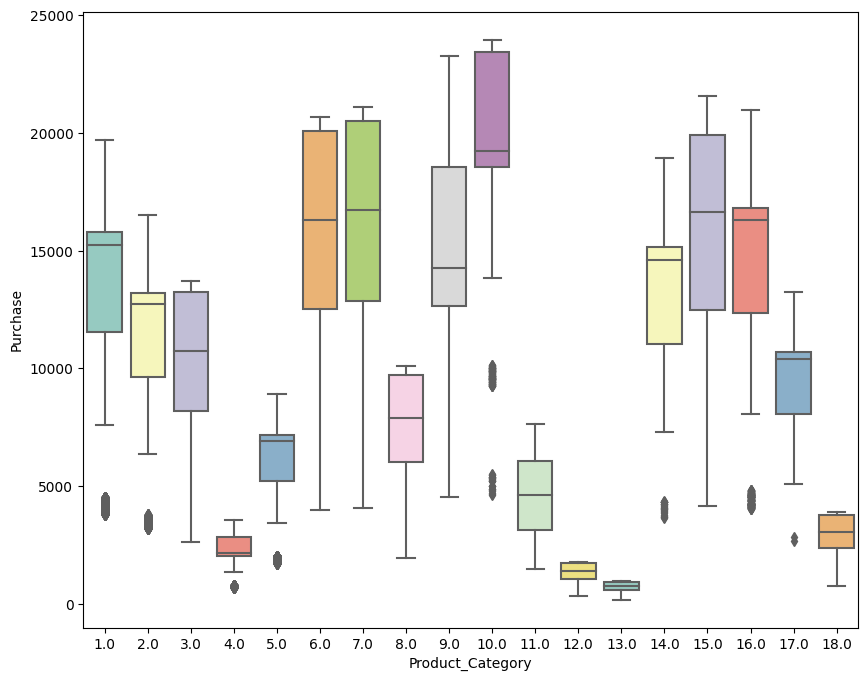

In [20]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,16))
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(df, y='Purchase', x=attrs[count], ax=axes[row, col], palette='Set3')
        axes[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x='Product_Category', palette='Set3')
plt.show()

###Multi-variate Analysis

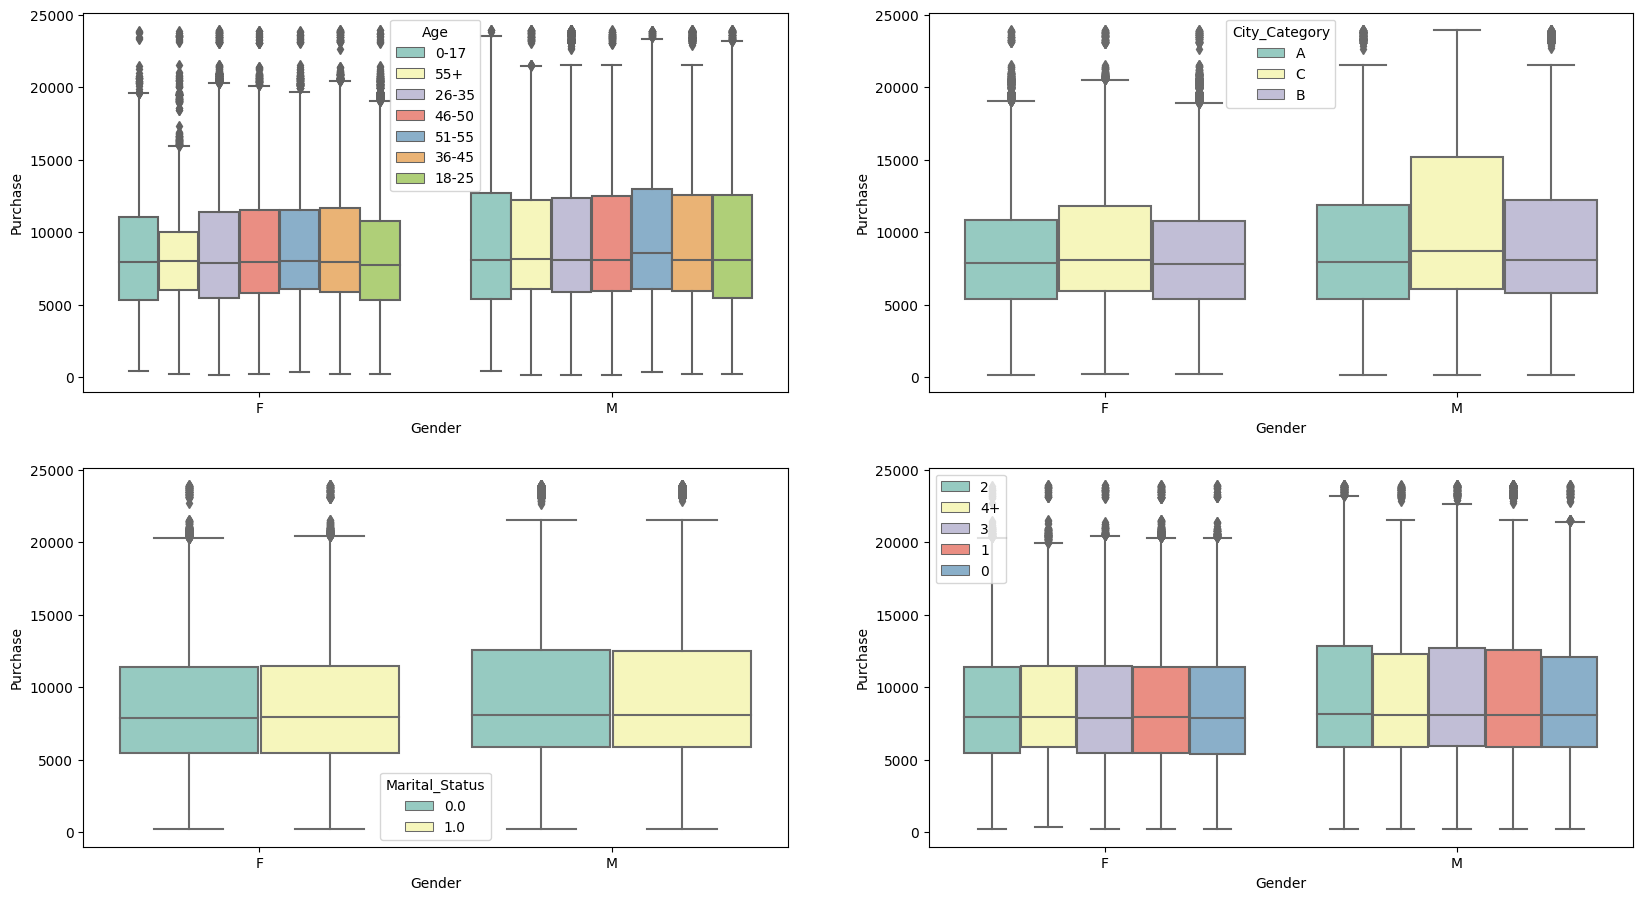

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

In [22]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


Average amount spend per customer for Male and Female

In [23]:
amt_df = df.groupby(['User_ID','Gender'])['Purchase'].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,142437.0
1,1000002,M,206167.0
2,1000003,M,100271.0
3,1000004,M,70456.0
4,1000005,M,242828.0
...,...,...,...
5880,1006036,F,1056516.0
5881,1006037,F,435249.0
5882,1006038,F,6878.0
5883,1006039,F,169794.0


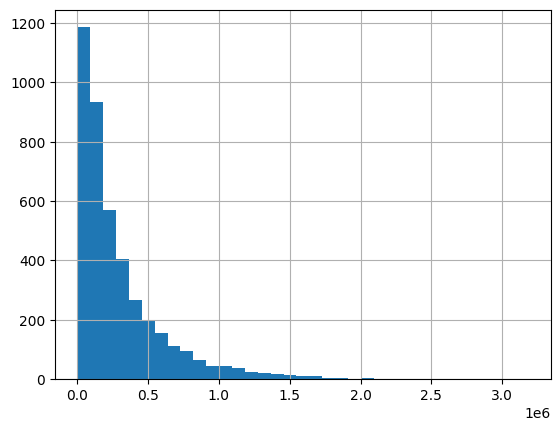

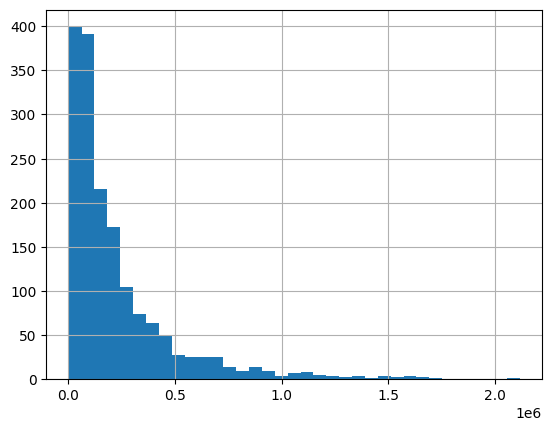

In [24]:
# histogram of average amount spend for each customer - Male & Female
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

In [25]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 296962.96
Average amount spend by Female customers: 227763.92


Observations:
- Male customers spend more money than Female customers

In [26]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [27]:
genders = ['M', 'F']
male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

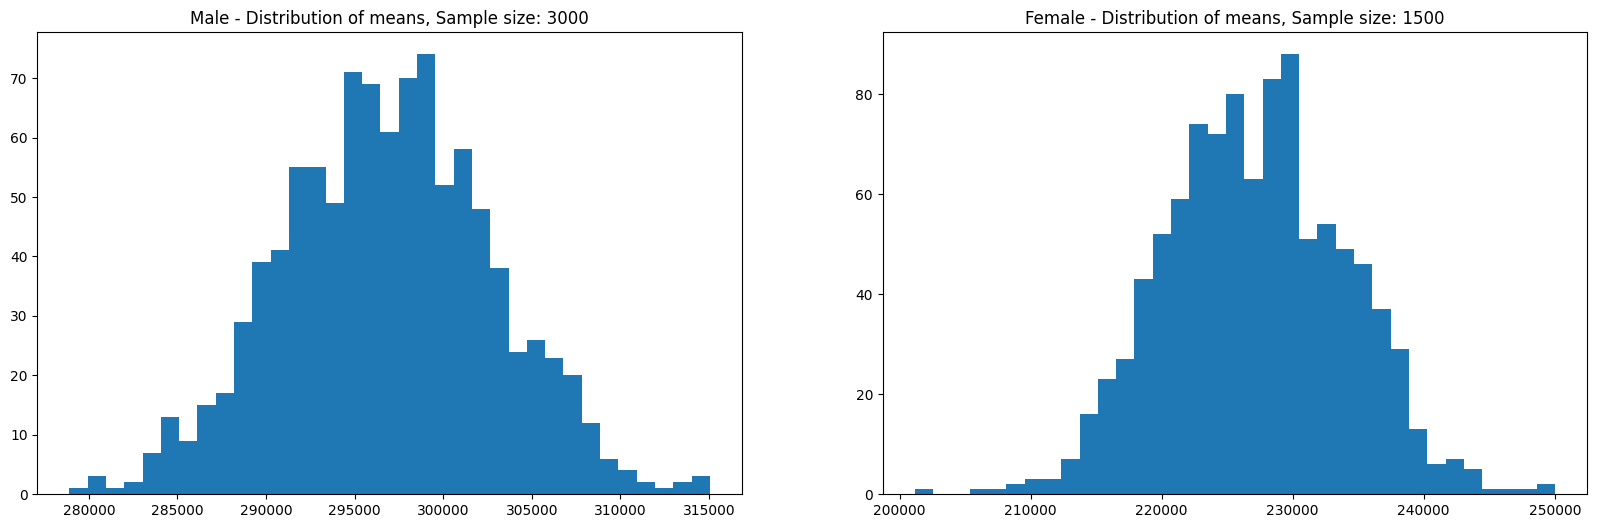

In [28]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [29]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 296857.66
Population mean - Mean of sample means of amount spend for Female: 227118.63

Male - Sample mean: 296962.96 Sample std: 323824.65
Female - Sample mean: 227763.92 Sample std: 263140.71


**Observation**

Now using the **Central Limit Theorem** for the population we can say that:

- Average amount spend by male customers is 9,26,341.86
- Average amount spend by female customers is 7,11,704.09

In [30]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (287193.78, 306732.15)
Female confidence interval of means: (215120.41, 240407.42)


Observations:

Now we can infer about the population that, 95% of the times:

- Average amount spend by male customer will lie in between: (895617.83, 955070.97)
- Average amount spend by female customer will lie in between: (673254.77, 750794.02)

###Married VS UnMarried

In [31]:
amt_df.head()

,User_ID,Gender,Purchase
0,1000001,F,142437.0
1,1000002,M,206167.0
2,1000003,M,100271.0
3,1000004,M,70456.0
4,1000005,M,242828.0


In [33]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df.head()

,User_ID,Marital_Status,Purchase
0,1000001,0.0,142437.0
1,1000002,0.0,206167.0
2,1000003,0.0,100271.0
3,1000004,1.0,70456.0
4,1000005,1.0,242828.0


In [34]:
amt_df['Marital_Status'].value_counts()

0.0    3413
1.0    2472
Name: Marital_Status, dtype: int64

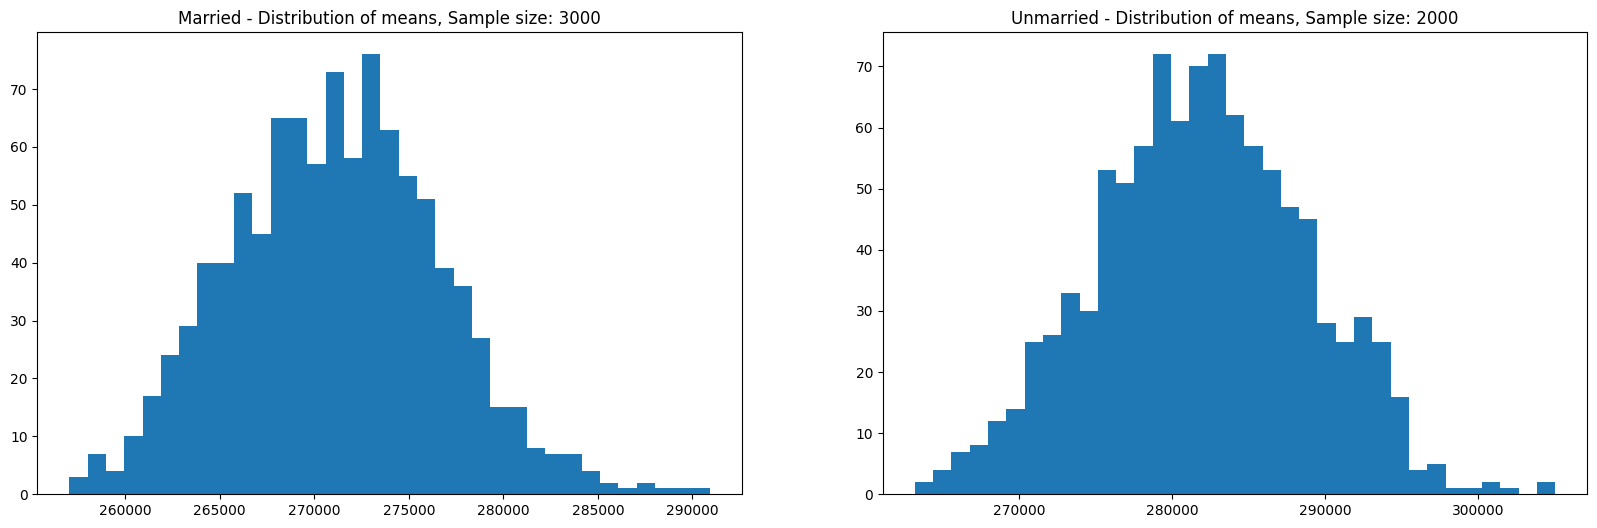

Population mean - Mean of sample means of amount spend for Married: 271149.11
Population mean - Mean of sample means of amount spend for Unmarried: 281910.82

Married - Sample mean: 271150.08 Sample std: 306095.53
Unmarried - Sample mean: 281921.14 Sample std: 311794.44


In [35]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

In [36]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (259083.37, 283216.78)
Unmarried confidence interval of means: (271460.54, 292381.73)


### Calculating the average amount spent by Age

In [38]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df.head()

,User_ID,Age,Purchase
0,1000001,0-17,142437.0
1,1000002,55+,206167.0
2,1000003,26-35,100271.0
3,1000004,46-50,70456.0
4,1000005,26-35,242828.0


In [39]:
amt_df['Age'].value_counts()

26-35    2051
36-45    1166
18-25    1067
46-50     530
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [40]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

### Insights

- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 75% of the users are **`Male`** and 25% are **`Female`**
- 60% Single, 40% Married
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- Total of 20 product categories are there
- There are 20 differnent types of occupations in the city

<br>


- Most of the users are `Male`
- There are 20 different types of `Occupation` and `Product_Category`
- More users belong to `B` `City_Category`
- More users are `Single` as compare to `Married`
- `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.

<br>

- **Average amount** spend by **Male** customers: **925344.40**
- **Average amount** spend by **Female** customers: **712024.39**

<br>

#### Confidence Interval by Gender
Now using the **Central Limit Theorem** for the **population**:
1. Average amount spend by **male** customers is **9,26,341.86**
2. Average amount spend by **female** customers is **7,11,704.09**

Now we can infer about the population that, **95% of the times**:

1. Average amount spend by **male** customer will lie in between: **(895617.83, 955070.97)**
2. Average amount spend by **female** customer will lie in between: **(673254.77, 750794.02)**


#### Confidence Interval by Marital_Status
1. **Married** confidence interval of means: **(806668.83, 880384.76)**
2. **Unmarried** confidence interval of means: **(848741.18, 912410.38)**


#### Confidence Interval by Age

1. For **age 26-35** --> confidence interval of means: **(945034.42, 1034284.21)**
2. For **age 36-45** --> confidence interval of means: **(823347.80, 935983.62)**
3. For **age 18-25** --> confidence interval of means: **(801632.78, 908093.46)**
4. For **age 46-50** --> confidence interval of means: **(713505.63, 871591.93)**
5. For **age 51-55** --> confidence interval of means: **(692392.43, 834009.42)**
6. For **age 55+** --> confidence interval of means: **(476948.26, 602446.23)**
7. For **age 0-17** --> confidence interval of means: **(527662.46, 710073.17)**

### Recommendations

1. Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
2. **Product_Category - 1, 5, 8** have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
3. **Unmarried** customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
4. Customers in the **age 18-45** spend more money than the others, So company should focus on acquisition of customers who are in the **age 18-45**
5. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.